In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [2]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))       
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                         
    return results

x_train = vectorize_sequences(train_data)              
x_test = vectorize_sequences(test_data)     

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from network3 import *
output = relu(dot(W, input) + b)

ModuleNotFoundError: No module named 'network3'

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5185 - acc: 0.7861 - val_loss: 0.3925 - val_acc: 0.8714
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3119 - acc: 0.9039 - val_loss: 0.3088 - val_acc: 0.8877
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2288 - acc: 0.9259 - val_loss: 0.2840 - val_acc: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1800 - acc: 0.9413 - val_loss: 0.2846 - val_acc: 0.8875
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1475 - acc: 0.9535 - val_loss: 0.3246 - val_acc: 0.8714
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1188 - acc: 0.9656 - val_loss: 0.2905 - val_acc: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0991 - acc: 0.9732 - val_loss: 0.3070 - val_acc: 0.8839
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0813 - a

In [18]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

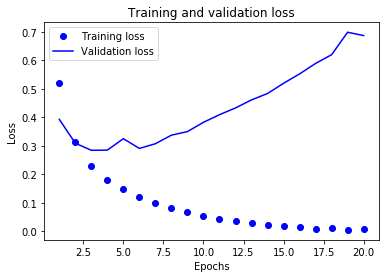

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')     
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

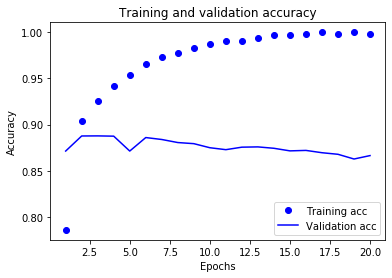

In [20]:
plt.clf()                                      
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4466 - accuracy: 0.8162
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2558 - accuracy: 0.9095
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1980 - accuracy: 0.9289
Epoch 4/4
782/782 [==============================] - 1s 797us/step - loss: 0.2970 - accuracy: 0.8824


In [22]:
results

[0.2970082759857178, 0.8824399709701538]

In [23]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [24]:
len(train_data)
len(test_data)

2246

In [25]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [26]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])      

557056/550378 [==============================] - 0s 1us/step


In [27]:
train_labels[10]

3

In [28]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)           
x_test = vectorize_sequences(test_data)

In [29]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels) 

In [30]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 2.7469 - accuracy: 0.5403 - val_loss: 1.8173 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4342 - accuracy: 0.7171 - val_loss: 1.3036 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0302 - accuracy: 0.7860 - val_loss: 1.1259 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8018 - accuracy: 0.8315 - val_loss: 1.0205 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6404 - accuracy: 0.8642 - val_loss: 0.9746 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5122 - accuracy: 0.8936 - val_loss: 0.9179 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4138 - accuracy: 0.9137 - val_loss: 0.9098 - val_accuracy: 0.8130
Epoch 8/20
16

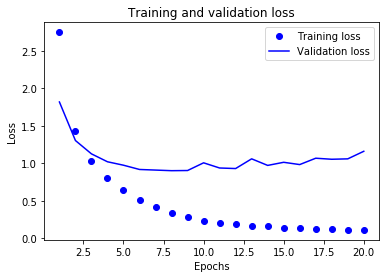

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
plt.clf()                                               

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 22ms/step - loss: 2.7742 - accuracy: 0.5467 - val_loss: 1.8510 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.4816 - accuracy: 0.7043 - val_loss: 1.3572 - val_accuracy: 0.7070
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0671 - accuracy: 0.7736 - val_loss: 1.1452 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8284 - accuracy: 0.8267 - val_loss: 1.0490 - val_accuracy: 0.7890
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6568 - accuracy: 0.8673 - val_loss: 0.9789 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5248 - accuracy: 0.8915 - val_loss: 0.9556 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4225 - accuracy: 0.9137 - val_loss: 0.9393 - val_accuracy: 0.7950
Epoch 8/9
16/16 [===

In [38]:
results

[0.9962309002876282, 0.7858415246009827]

In [40]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [41]:
train_data.shape
test_data.shape

(102, 13)

In [42]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [43]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [44]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()                                  
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [45]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    model.fit(partial_train_data, partial_train_targets,                     
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [46]:
all_scores

[1.8429356813430786,
 2.5729525089263916,
 3.0591468811035156,
 2.5216643810272217]

In [47]:
np.mean(all_scores)

2.499174863100052

In [49]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    history = model.fit(partial_train_data, partial_train_targets,           
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [50]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

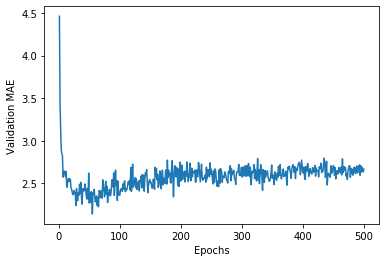

In [51]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

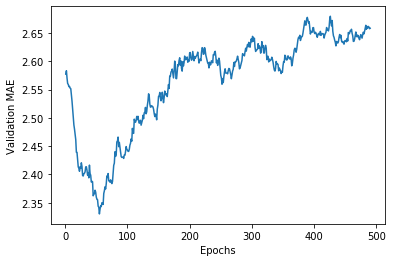

In [52]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [53]:
model = build_model()                                                     
model.fit(train_data, train_targets,                                      
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 860us/step - loss: 19.2104 - mae: 2.7543


In [54]:
test_mae_score

2.754263401031494